In questo colab plottiamo i dati relativi ai tempi di esecuzione di vari modelli testati con ScaleSim

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('exec_time_SS1.csv').sort_values(by='numero di livelli')
df2 = pd.read_csv('exec_time_SS2.csv').sort_values(by='numero di livelli')

In [3]:
df2.head()

,nome,numero di livelli,tempo di esecuzione,Grandezza massima file generato,Grandezza medie files generati
0,deep_voice,6,2.296844,246,129
3,google_translate_dec,11,4.749994,246,129
4,google_translate_enc,12,4.968779,246,129
1,FasterRCNN,49,902.353322,162813,6638
5,Resnet50,57,923.326721,32729,6112


In [4]:
exec_time_log_1 = np.log(df1["tempo di esecuzione"])
exec_time_log_2 = np.log(df2["tempo di esecuzione"])

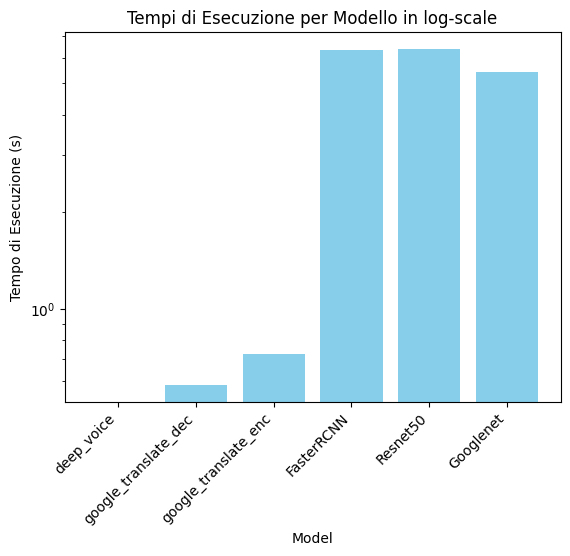

In [28]:
plt.bar(df1['nome'], exec_time_log_1, color='skyblue')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title("Tempi di Esecuzione per Modello in log-scale")
plt.xlabel("Model")
plt.ylabel("Tempo di Esecuzione (s)")

plt.show()

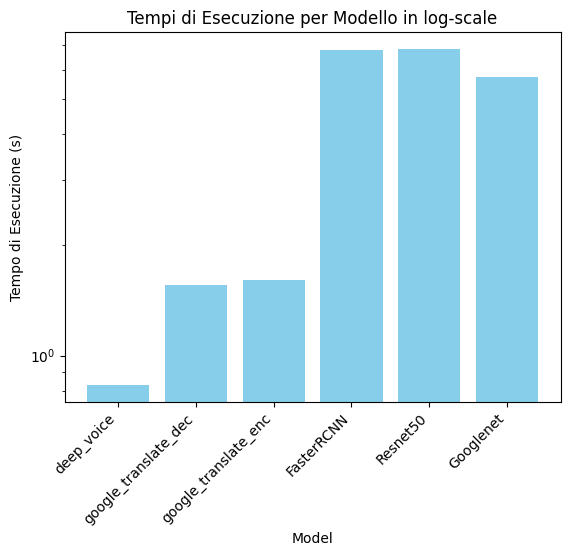

In [29]:
plt.bar(df2['nome'], exec_time_log_2, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.title("Tempi di Esecuzione per Modello in log-scale")
plt.xlabel("Model")
plt.ylabel("Tempo di Esecuzione (s)")

plt.show()

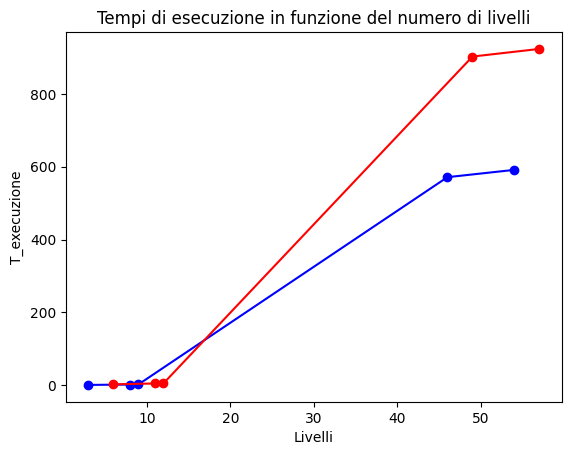

In [7]:
plt.plot(df1['numero di livelli'][:-1], df1['tempo di esecuzione'][:-1], marker='o', linestyle='-', color='blue')
plt.plot(df2['numero di livelli'][:-1], df2['tempo di esecuzione'][:-1], marker='o', linestyle='-', color='red')

plt.title("Tempi di esecuzione in funzione del numero di livelli")
plt.xlabel("Livelli")
plt.ylabel("T_execuzione")

# Mostra il grafico
plt.show()

In [24]:
#np.log10()
max_f_weight_1 = df1["Grandezza massima file generato"]
max_f_weight_2 = df2["Grandezza massima file generato"]
avg_f_weight_1 = df1["Grandezza massima file generato"]
avg_f_weight_2 = df2["Grandezza massima file generato"]

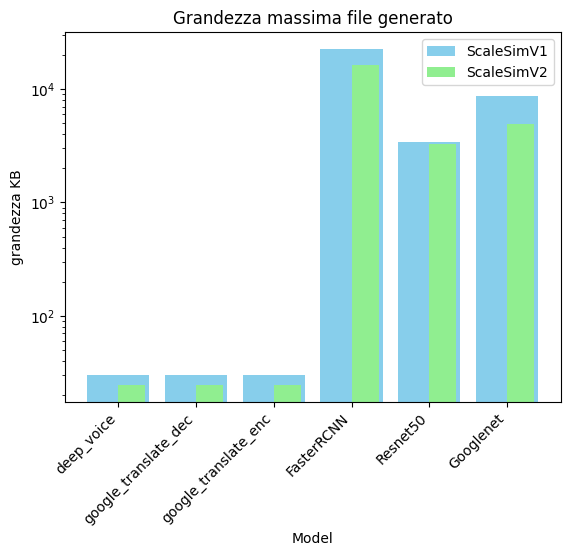

In [30]:
n = len(df2['nome'])
ind = np.arange(n)
width = 0.35
fig, ax = plt.subplots()

plt.bar(df2['nome'], max_f_weight_1, color='skyblue')
bar1 = ax.bar(ind - width/2, avg_f_weight_1, width, label='ScaleSimV1', color='skyblue')

# Barre del secondo dataset
bar2 = ax.bar(ind + width/2, avg_f_weight_2, width, label='ScaleSimV2', color='lightgreen')

ax.set_xticks(ind)
ax.set_yscale('log')
ax.set_xticklabels(df2['nome'], rotation=45, ha='right')
plt.title("Grandezza massima file generato")
plt.xlabel("Model")
plt.ylabel("grandezza KB")

plt.legend()

plt.show()

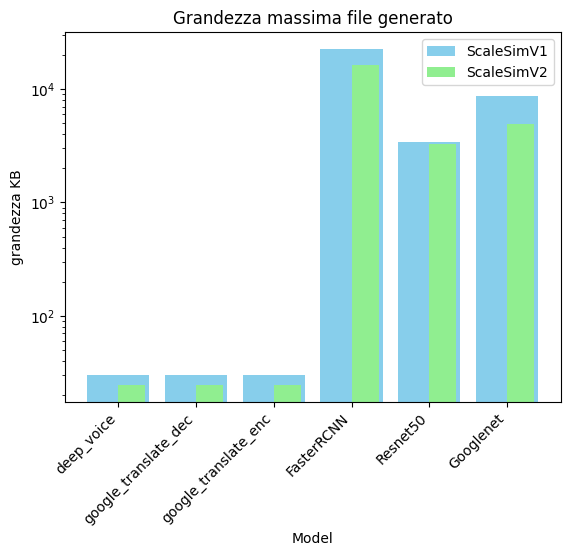

In [26]:
n = len(df2['nome'])
ind = np.arange(n)
width = 0.35
fig, ax = plt.subplots()

plt.bar(df2['nome'], max_f_weight_1, color='skyblue')
bar1 = ax.bar(ind - width/2, max_f_weight_1, width, label='ScaleSimV1', color='skyblue')

# Barre del secondo dataset
bar2 = ax.bar(ind + width/2, max_f_weight_2, width, label='ScaleSimV2', color='lightgreen')

ax.set_xticks(ind)
ax.set_yscale('log')
ax.set_xticklabels(df2['nome'], rotation=45, ha='right')
plt.title("Grandezza massima file generato")
plt.xlabel("Model")
plt.ylabel("grandezza KB")

plt.legend()

plt.show()

Plotto l'andamento solo della grandezza media al variare dei livelli

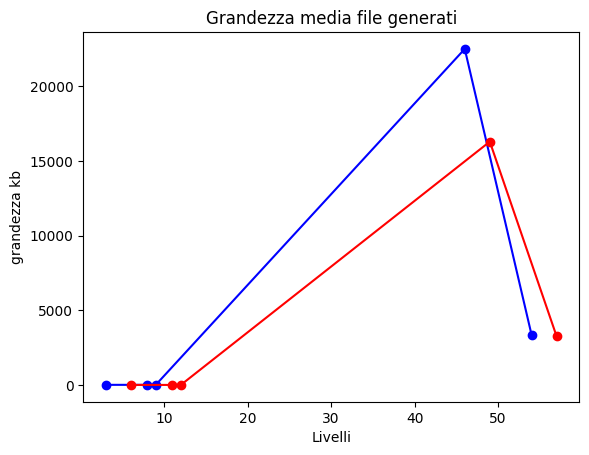

In [33]:
plt.plot(df1['numero di livelli'][:-1], avg_f_weight_1[:-1], marker='o', linestyle='-', color='blue')
plt.plot(df2['numero di livelli'][:-1], avg_f_weight_2[:-1], marker='o', linestyle='-', color='red')

plt.title("Grandezza media file generati")
plt.xlabel("Livelli")
plt.ylabel("grandezza kb")

# Mostra il grafico
plt.show()